In [68]:
!pip install tqdm

In [69]:
import pandas as pd
import numpy as np
import seaborn as sns

from numpy import loadtxt
from matplotlib import pyplot as plt
from tqdm import tqdm
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [70]:
X_train = pd.DataFrame(loadtxt(
    "D:\Рабочий стол\Мэг_питон\ML\Базы данных\X_train.txt"))
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [71]:
X_train.info() # Всего 561 признак

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, 0 to 560
dtypes: float64(561)
memory usage: 31.5 MB


In [72]:
X_train.isna().sum().sum() # Пропусков нет

0

In [73]:
X_train.describe() # Данные имеют разные средние и отклонения

,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,...,0.125293,-0.307009,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,...,0.250994,0.321011,0.307584,0.336787,0.448306,0.608303,0.477975,0.511807,0.297480,0.279122
min,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-0.995357,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,0.262975,-0.024863,-0.120993,-0.992754,-0.978129,-0.980233,-0.993591,-0.978162,-0.980251,-0.936219,...,-0.023692,-0.542602,-0.845573,-0.121527,-0.289549,-0.482273,-0.376341,-0.812065,-0.017885,-0.143414
50%,0.277193,-0.017219,-0.108676,-0.946196,-0.851897,-0.859365,-0.950709,-0.857328,-0.857143,-0.881637,...,0.134000,-0.343685,-0.711692,0.009509,0.008943,0.008735,-0.000368,-0.709417,0.182071,0.003181
75%,0.288461,-0.010783,-0.097794,-0.242813,-0.034231,-0.262415,-0.292680,-0.066701,-0.265671,-0.017129,...,0.289096,-0.126979,-0.503878,0.150865,0.292861,0.506187,0.359368,-0.509079,0.248353,0.107659
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.946700,0.989538,0.956845,1.000000,1.000000,0.998702,0.996078,1.000000,0.478157,1.000000


<Axes: >

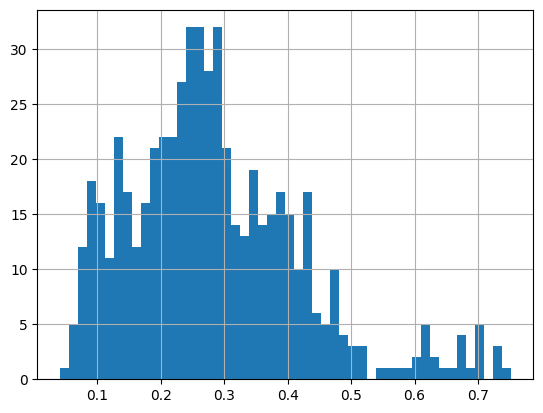

In [74]:
X_train.describe().loc['std', :].hist(bins=50) 
# распределение значений, проверка одинаковости масштаба
#Если это про PCA, то надо посмотреть, равны ли стандартные отклонения 1,
# и средние 0, убедиться, что не совсем равны

Text(0.5, 1.0, 'Гистограмма дисперсии признаков')

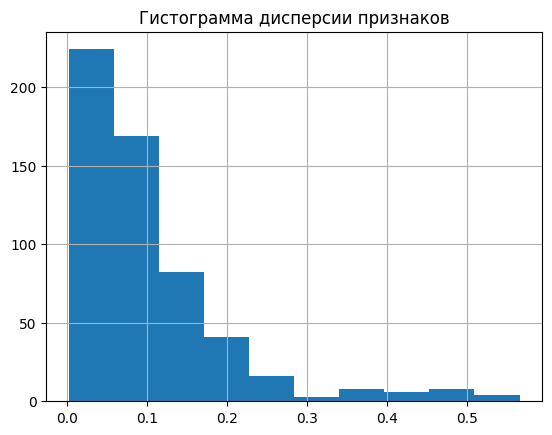

In [75]:
X_train.var().hist()
plt.title('Гистограмма дисперсии признаков')
# видим диапазон дисперсии 0 - 0.5

Средние и отклонение признаков имеют разный небольшой разброс, для улучшения модели необходимо масштабирование

3. Снижение размерности данных

Метод порога отклонения

In [76]:
q = X_train.var().quantile(0.1) 
q # значение 10% перцентиля дисперсии признаков

0.014522485837797375

In [77]:
# удаление 10% низковариативных признаков
var_selector=VarianceThreshold(threshold=q) 
X_train_var = var_selector.fit_transform(X_train)
X_train_var.shape #  удалено 56 признаков

(7352, 504)

PCA

In [78]:
# Масштабирование признаков
features_norm = StandardScaler().fit_transform(X_train_var) 

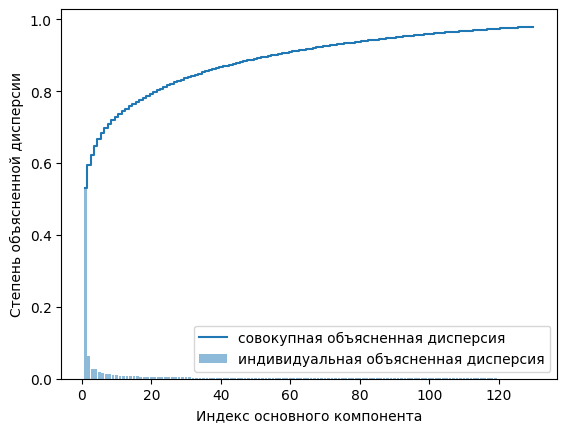

In [79]:
pca = PCA(n_components = 130)
pca.fit(features_norm)
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)

plt.bar(range(1, 131), var_exp, alpha=0.5,
        align='center', label='индивидуальная объясненная дисперсия')
plt.step(range(1, 131), cum_var_exp, where='mid',
         label='совокупная объясненная дисперсия')
plt.ylabel('Степень объясненной дисперсии')
plt.xlabel('Индекс основного компонента')
plt.legend(loc='best')
plt.show()

In [80]:
cumsum = np.cumsum(var_exp)
d = np.argmax(cumsum >= 0.90) + 1
d # 91 - 0.95, 115 - 0.97, 2 компоненты обЪясняют 59% дисперсии

56

Количество измерений может быть уменьшено с 504 до 56 при сохранении 90% дисперсии данных

In [81]:
pca = PCA(n_components = 2) # выделили 2 главные компоненты
features_reduced_1 = pca.fit_transform(features_norm) # уменьшили размерность

In [82]:
features_reduced_2 = pd.DataFrame(features_reduced_1)
features_reduced_2.corr() 
# новые векторы полностью декоррелированы

,0,1
0,1.000000e+00,1.233742e-16
1,1.233742e-16,1.000000e+00


Text(0, 0.5, 'Компонент 2')

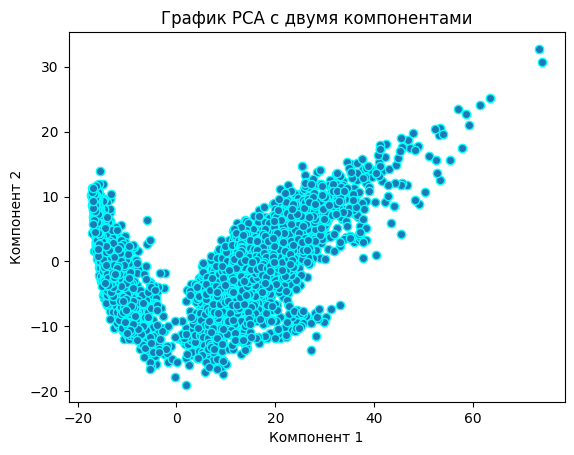

In [83]:
plt.scatter(features_reduced_1[:, 0], features_reduced_1[:, 1],
             edgecolor='aqua')
plt.title('График PCA с двумя компонентами')
plt.xlabel('Компонент 1')
plt.ylabel('Компонент 2')

Убедились. Новые признаки позволяют неплохо отделить данные друг от друга

4. Подбор оптимального числа кластеров

In [84]:
distortion = []
K = range(1, 12)
for k in tqdm(K):
    model = KMeans(n_clusters=k, random_state=4)
    model.fit(features_norm)
    distortion.append(model.inertia_) 

  0%|          | 0/11 [00:00<?, ?it/s]c:\Users\Танюша\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
  9%|▉         | 1/11 [00:00<00:01,  6.10it/s]c:\Users\Танюша\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
 18%|█▊        | 2/11 [00:00<00:02,  4.37it/s]c:\Users\Танюша\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super

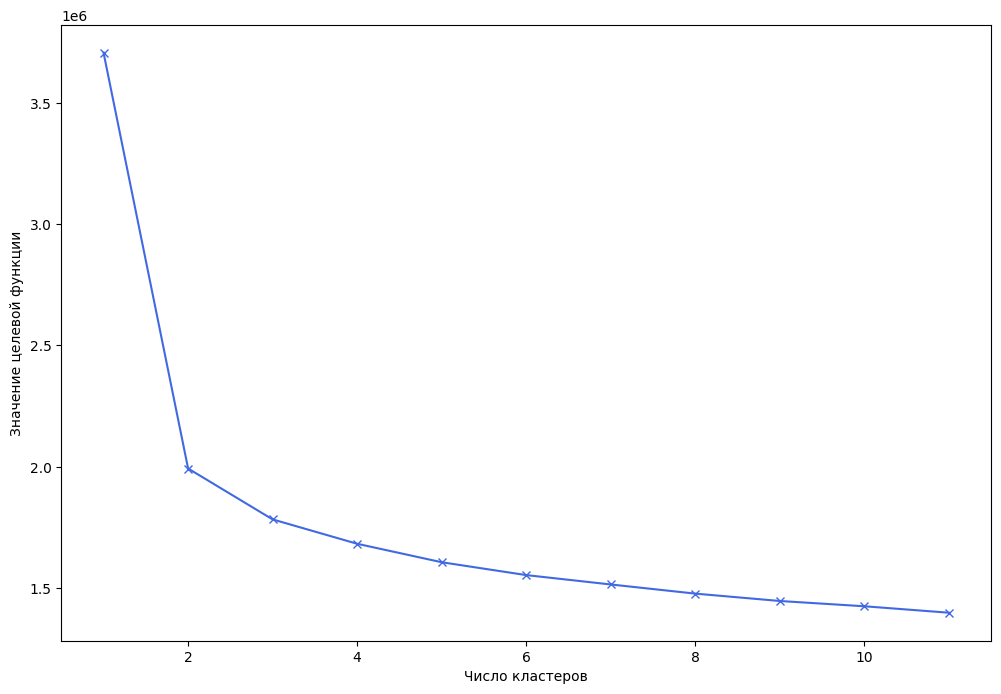

In [85]:
plt.figure(figsize=(12, 8))
plt.plot(K, distortion, c='royalblue', marker='x')
plt.xlabel('Число кластеров')
plt.ylabel('Значение целевой функции')
plt.show()

Значение целевой функции перестает резко уменьшаться (переходный момент) при количестве кластеров = 2 (оптимальное число)

In [86]:
pca = PCA(n_components = 56) # выделили 56 компонент
features_norm_56 = pca.fit_transform(features_norm) # и уменьшили размерность

In [88]:
model = KMeans(n_clusters=2, random_state=45) # кластеризация_56
model.fit(features_norm_56)
features_reduced_56 = pd.DataFrame(features_norm_56)
features_reduced_56['cluster'] = model.labels_

c:\Users\Танюша\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [87]:
model = KMeans(n_clusters=2, random_state=45) # кластеризация
model.fit(features_norm)

features_reduced_2['cluster'] = model.labels_

c:\Users\Танюша\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [89]:
pca = PCA(n_components = 2) # выделили 2 главные компоненты
features_reduced_1 = pca.fit_transform(features_norm) # уменьшили размерность

features_reduced_2 = pd.DataFrame(features_reduced_1)
features_reduced_2['cluster'] = model.labels_

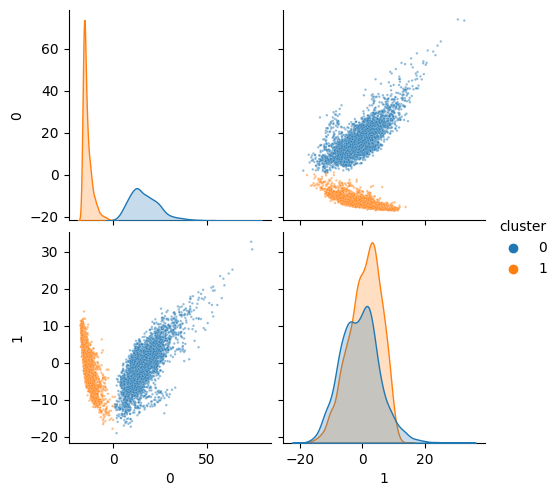

In [90]:
sns.pairplot(features_reduced_2, plot_kws={'s':3, 'alpha':0.5}, hue = 'cluster')

In [91]:
map_color_1 = {0: 'blue', 1: 'orange'}

Text(0, 0.5, 'Компонент 2')

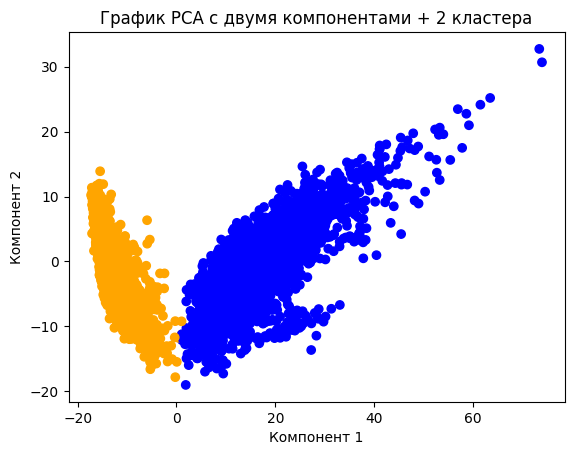

In [92]:

plt.scatter(features_reduced_1[:, 0], features_reduced_1[:, 1],
             c=features_reduced_2['cluster'].map(map_color_1))
plt.title('График PCA с двумя компонентами + 2 кластера')
plt.xlabel('Компонент 1')
plt.ylabel('Компонент 2')

In [93]:
map_color = {0: 'aqua', 1: 'yellow'}

Text(0, 0.5, 'Компонент 2')

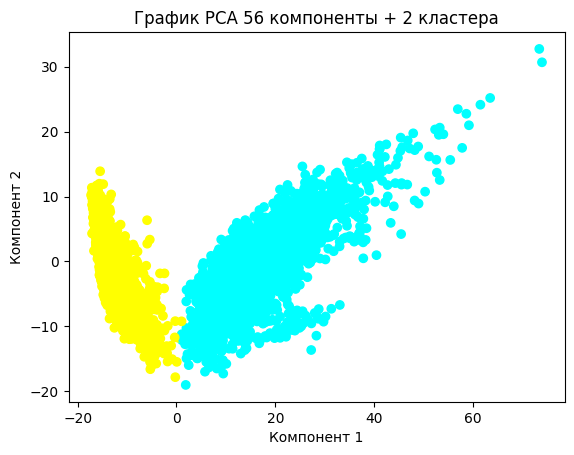

In [94]:
plt.scatter(features_norm_56[:, 0], features_norm_56[:, 1],
             c=features_reduced_56['cluster'].map(map_color))
plt.title('График PCA 56 компоненты + 2 кластера')
plt.xlabel('Компонент 1')
plt.ylabel('Компонент 2')

5. Оценка качества кластеризации

In [95]:
y_train = pd.DataFrame(loadtxt(
    "D:\Рабочий стол\Мэг_питон\ML\Базы данных\y_train.txt"), 
    columns=['meaning'])
y_train

,meaning
0,5.0
1,5.0
2,5.0
3,5.0
4,5.0
...,...
7347,2.0
7348,2.0
7349,2.0
7350,2.0


In [96]:
activity_labels = pd.DataFrame(loadtxt(
    r"D:\Рабочий стол\Мэг_питон\ML\Базы данных\activity_labels.txt",
    dtype=str), columns=['index', 'activity'])
activity_labels

,index,activity
0,1,WALKING
1,2,WALKING_UPSTAIRS
2,3,WALKING_DOWNSTAIRS
3,4,SITTING
4,5,STANDING
5,6,LAYING


In [97]:
y_train['meaning'] = y_train['meaning'].replace(
    {1.0:'Ходьба', 2.0:'Подъем по лестнице',3.0:'Спуск по лестнице', 
    4.0:'Положение сидя', 5.0:'Положение стоя', 6.0:'Положение лёжа'})

In [98]:
df = pd.DataFrame({'cluster':features_reduced_2['cluster'],
                    'activity':y_train['meaning']})
df_activity_cluster = pd.pivot_table(df, index='activity',
                 columns='cluster', aggfunc=len, fill_value=0)
df_activity_cluster # сводная таблица

cluster,0,1
activity,,
Подъем по лестнице,1068,5
Положение лёжа,11,1396
Положение сидя,1,1285
Положение стоя,0,1374
Спуск по лестнице,986,0
Ходьба,1226,0


In [99]:
df = pd.DataFrame({'cluster':features_reduced_56['cluster'],
                    'activity':y_train['meaning']})
df_activity_cluster = pd.pivot_table(df, index='activity',
                 columns='cluster', aggfunc=len, fill_value=0)
df_activity_cluster # сводная таблица 2

cluster,0,1
activity,,
Подъем по лестнице,1068,5
Положение лёжа,11,1396
Положение сидя,1,1285
Положение стоя,0,1374
Спуск по лестнице,986,0
Ходьба,1226,0


Качество кластеризации хорошее. Первое объединение включает в себя `подъем, спуск по лестнице и ходьбу`, т.е. физическая активность (фиксирование в среднем более высоких показателей), второе - `положение лёжа, сидя и стоя` - период покоя.  
Попадание некоторых наблюдений в другие класторы предполагаемо характерезуется выбросами, пограничными показаниями.